# 5. Complex waves

Complex numbers are extremely useful for describing the propagation of waves. This includes electromagnetic waves (radio waves, visible light, X-rays, etc.), sound waves, quantum mechanical wavefunctions, and more. It is therefore very important for physicists to have a good understanding of the complex description of wave phenomena.

## The wave equation

To describe wave propagation in space and time, we use a [partial differential equation](01_derivatives.ipynb#PDE) (PDE) known as the **time-dependent wave equation**.  For simplicity, we restrict our attention to a single spatial coordinate, denoted $x$.  The time coordinate is denoted $t$. We describe a wave using a function $f(x,t)$, called the **wavefunction**, which specifies the value of some measurable physical quantity at each position $x$ and time $t$.  For instance, for a sound wave $f(x,t)$ stands for the pressure of the air at that position and time.

The time-independent wave equation is:

$$\frac{\partial^2 f}{\partial x^2} = \frac{1}{c^2} \frac{\partial^2 f}{\partial t^2}.$$

The constant $c$ is called the **wave speed**, for a reason that will shortly become clear.  For neatness, we sometimes write the wave equation by putting everything on one side:

$$\left(\frac{\partial^2}{\partial x^2} - \frac{1}{c^2} \frac{\partial^2}{\partial t^2}\right) \; f(x,t) = 0.$$

### Real solutions to the wave equation

We first consider real solutions to the wave equation. There exists a family of solutions known as **travelling waves**, which have the form

$$f(x,t) = f_0 \, \cos\big(kx - \omega t + \phi\big)\;\;\mathrm{where}\;\; \left|\frac{\omega}{k}\right| = c.$$

By direct substitution, you can verify that this satisfies the PDE.  Here, $f_0$ is called the **amplitude** of the wave, $\phi$ is the **phase**, $\omega$ is the **frequency**, and $k$ is the **wavenumber**. (Note: some authors call $\omega$ the "angular frequency", reserving the term "frequency" for the quantity $f = \omega/2\pi$.  But we'll simply deal in terms of $\omega$ rather than $f$, and call $\omega$ the frequency.)  By convention, we usually take $\omega > 0$. The frequency and wavenumber are inversely related to the **period** $T = 2\pi/\omega$ and the **wavelength** $\lambda = 2\pi/|k|$.

This solution describes a sinusoidal wave that is moving to the right (for positive $k$) or to the left (for negative $k$) with constant speed $c$. To see why, observe that if time advances by $\delta t$, the cosine is left unchanged if we change $x$ by $\delta x = \omega \delta t / k$.  Thus, during the time interval $\delta t$, the wave shifts by $\delta x$, so

$$\mathrm{speed} \; = \frac{|\delta x|}{\delta t} = \frac{\omega}{|k|} = c.$$

This is why we refer to $c$ as the wave speed.

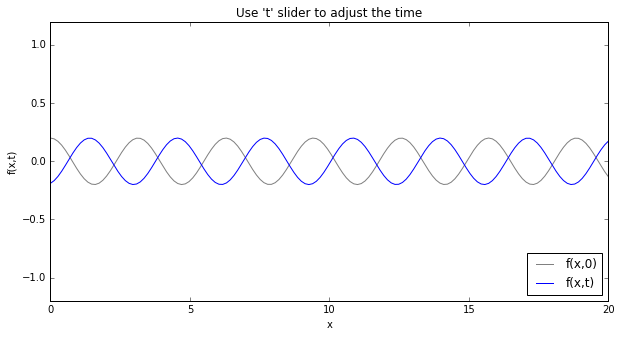

In [6]:
%matplotlib inline
from ipywidgets import interact, FloatSlider
from numpy import linspace, cos
import matplotlib.pyplot as plt

def plot_traveling_wave(t, k, omega, f0, phi):
    x  = linspace(0, 20., 150)
    y  = f0 * cos(k*x - omega*t + phi)
    y0 = f0 * cos(k*x + phi)
    plt.figure(figsize=(10,5))
    plt.plot(x, y0, color='grey', label="f(x,0)")
    plt.plot(x, y,  color='blue', label="f(x,t)")
    plt.title("Use 't' slider to adjust the time")
    plt.xlim(x[0], x[-1])
    plt.ylim(-1.2, 1.2)
    plt.xlabel('x')
    plt.ylabel('f(x,t)')
    plt.legend(loc='lower right')

interact(plot_traveling_wave,
         t    = FloatSlider(min=0.0,  max=20.0, step=0.1,  value=0.4),
         k    = FloatSlider(min=-2.0, max=2.0,  step=0.1,  value=1.0),
         omega= FloatSlider(min=1.0,  max=2.0,  step=0.1,  value=1.0),
         f0   = FloatSlider(min=0.0,  max=1.0,  step=0.1,  value=1.0),
         phi  = FloatSlider(min=0.0,  max=6.28, step=0.01, value=0.0));

The travelling wave solution is valid for *any* $\omega > 0$. For sound waves, these different frequencies correspond to the human sensation of pitch. For light waves, the different frequencies correspond to color. Since $|k| = \omega/c$, higher frequencies correspond to larger wavenumbers, i.e. shorter wavelengths.

Since the wave equation is linear, any linear superposition of traveling waves is also a solution.  For example, suppose we have two waves of equal amplitude and frequency, moving in opposite directions:

$$f(x,t) = f_0 \, \cos(kx - \omega t + \phi_1) + A \cos(-kx - \omega t + \phi_2),$$

for some $k = \omega/c$.  Such a superposition is a solution to the wave equation known as a **standing wave**:

$$f(x,t) = 2f_0 \, \cos\big[kx + (\phi_1-\phi_2)/2\big]\, \cos\big[\omega t - (\phi_1+\phi_2)/2\big].$$

This is easily proven for the simplest case, $\phi_1 = \phi_2 = 0$.  For arbitrary $\phi_1, \phi_2$, the proof involves simple but tedious applications of the trignometric addition formulas.

### Complex solutions to the wave equation

It is much easier to deal with the wave equation if we look at *complex* solutions, by allowing the wavefunction $f(x,t)$ to take on complex values.  (Note: only the value of the wavefunction is complex; we continue to assume that $x$ and $t$ are real.) Since the wave equation is a linear PDE, the real part of any complex solution is a valid real solution.

The wave equation has complex solutions that are **complex travelling waves**, which take the form

$$f(x,t) = A \, e^{i(kx - \omega t)} \quad\mathrm{where}\;\; \left|\frac{\omega}{k}\right| = c.$$

Again, you can verify by direct substitution that this satisfies the PDE.  The complex constant $A$ is called the **complex amplitude** of the wave. Now, consider what happens if we take the real part of the complex travelling wave solution:

$$\begin{aligned}\mathrm{Re}\Big\{A \, e^{i(kx - \omega t)}\Big\} &= \mathrm{Re}\Big\{ \left(\big|A\big|\, e^{i\mathrm{arg}[A]}\right) \; e^{i(kx - \omega t)}\Big\} \\ &= \big|A\big|\; \mathrm{Re}\Big\{ e^{i\mathrm{arg}[A]} \, e^{i(kx - \omega t)}\Big\} \\ &= \big|A\big|\; \cos\big(kx - \omega t + \mathrm{arg}[A]\big)\end{aligned}$$

Here, we have made use of the [polar representation](03_complex_numbers.ipynb#polar) of the complex amplitude $A$.  Evidently, the magnitude $|A|$ serves as the *real* wave amplitude, while $\mathrm{arg}(A)$ serves as the phase factor $\phi$. In this sense, the complex solution is more mathematically succinct: a single complex parameter $A$ combines the roles of two separate parameters in the real solution.

The complex representation makes wave superpositions much easier to handle.  For example, consider again the superposition of equal-amplitude wave of frequency $\omega$, with arbitrary phases:

$$\begin{aligned}f(x,t) &= \displaystyle \big|A\big| \, e^{i(kx - \omega t + \phi_1)} + \big|A\big| \, e^{i(-kx - \omega t + \phi_2)} \\ &= \displaystyle \big|A\big|\, \left(e^{i(kx + \phi_1)} + e^{-i(kx - \phi_2)}\right)\, e^{-i\omega t} \\ &= \displaystyle \big|A\big|\, \left(e^{i[kx + (\phi_1-\phi_2)/2]} + e^{-i[kx + (\phi_1 - \phi_2)/2]}\right)\, e^{i(\phi_1 + \phi_2)/2} \,e^{-i\omega t} \\ &= \displaystyle 2\big|A\big|\, \cos\left[kx + (\phi_1-\phi_2)/2\right] \,e^{-i[\omega t -(\phi_1+\phi_2)/2]}\end{aligned}$$

Taking the real part then yields the result that we had previously obtained using trigonometric formulas.

## Waves in 3D space<a name="3dwaves"></a>

The wave equation can be easily generalized to three spatial dimensions.  Instead of $f(x,t)$, we have a wavefunction that depends on three spatial coordinates, $f(x,y,z,t)$.  The second-order derivative in $x$ is replaced by second-order derivatives in each spatial direction.  The generalized PDE is:

$$\left[\frac{\partial^2}{\partial x^2} + \frac{\partial^2}{\partial y^2} + \frac{\partial^2}{\partial z^2} - \frac{1}{c^2} \frac{\partial^2}{\partial t^2}\right] \; f(x,y,z,t) = 0.$$

This PDE supports complex travelling wave solutions of the form

$$f(x,y,z,t) = A \, e^{i(\vec{k} \cdot \vec{r} - \omega t)},$$

where

$$\vec{k} = \begin{bmatrix}k_x\\k_y\\k_z\end{bmatrix}, \;\;\; \vec{r} = \begin{bmatrix}x\\y\\z\end{bmatrix}, \;\;\;\frac{\omega}{\left|\vec{k}\right|} = c.$$

Again, you can verify that this is a solution by direct substitution.  We call $\vec{k}$ the **wave-vector**, which generalizes the wave-number parameter in the solution for 1D space.  The direction of the wave-vector the spatial direction in which the wave travels.

## Harmonic waves

We are often interested in waves undergoing **harmonic oscillation**, i.e. varying sinusoidally with a constant frequency $\omega$.  Such waves can be described by wavefunctions of the form

$$f(x,y,z,t) = \psi(x,y,z) \, e^{-i\omega t}.$$

By writing a wavefunction in this form, we are performing a **separation of variables**, which means specializing to solutions consisting of two factors, one depending only on $\vec{r}$ and the other only on $t$. This is a common method for simplifying PDEs, and is justified by the linearity of the wave equation.  If we can find harmonic solutions for each frequency $\omega$, then we can linearly combine them to form more general solutions.  As we shall see when discussing [Fourier transforms](09_fourier_transform.ipynb), such superpositions can be used to construct a general set of solutions to the PDE.

By direct substitution into the [3D wave equation](#3dwaves), we can show that $\psi(x)$ satisfies the differential equation

$$\left[\frac{\partial^2}{\partial x^2} + \frac{\partial^2}{\partial y^2} + \frac{\partial^2}{\partial z^2} + \left(\frac{\omega}{c}\right)^2\right] \, \psi(x) = 0.$$

This is related to the original time-dependent wave equation by the replacement of each $\partial/\partial t$ with $-i\omega$.  Thus, it contains $\omega$ as a numerical parameter.

We will postpone further discussion of the solution of this simplified PDE till later.

## Exercises

<ol>
<li>The complex representation for waves provides a convenient way to describe damping and amplification.  Consider again the complex wave equation

$$\frac{\partial^2 f}{\partial x^2} = \left(\frac{n}{c}\right)^2 \, \frac{\partial^2 f}{\partial t^2},$$

where $n$ is called the **refractive index**, which can take complex values.
<ol style="list-style-type:lower-alpha">
<li>Show that the propagating-wave solutions are either damped or amplified.  What determines whether they are damped or amplified?  In your answer, consider both left- and right-moving waves.</li>
<li>Try finding a real differential equation which has the same damped/amplified wave solutions.</li>
</ol>
<li>Consider the 1D wave equation in a enclosed box of length $L$ and uniform refractive index $n\in\mathbb{R}$.  Let the walls of the box be at $x = -L/2$ and $x = L/2$, and let the wavefunction go to zero at these points: $\psi(\pm L/2) = 0$.  For this boundary conditions, show that $\psi(x) = 0$ for all $x$, *except* for certain discrete values of the frequency $\omega$.  Find these frequencies, and the corresponding non-zero solutions $\psi(x)$.</li>
</ol>